# Biodiversity in National Parks


In [4]:
#Import modules

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats



In [5]:
#Read data

species = pd.read_csv('species_info.csv')
obs = pd.read_csv('observations.csv')

print(display(species.head()))
print(display(obs.head()))

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


None


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


None


In [6]:
#Check to see if any null values in the columns
null_species = species.isnull().sum(axis = 0)

null_obs = obs.isnull().sum(axis = 0)

print('null_species: ', null_species)
print('null_obs: ', null_obs)

null_species:  category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
null_obs:  scientific_name    0
park_name          0
observations       0
dtype: int64


In [7]:
#replace missing values
species.fillna('No Information', inplace=True)
new_null_species = species.isnull().sum(axis = 0)
print(new_null_species)


category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


In [8]:
#find unique values

# species
cat = species['category'].unique()
sci_name = species['scientific_name'].unique()
name = species['common_names'].unique()
con_stat = species['conservation_status'].unique()
#obs
sci_name2 = obs['scientific_name'].unique()
park = obs['park_name'].unique()

print('Categories: ', cat)
print('\n')
print('Scientific names in species df: ', sci_name)
print('\n')
print('Common names: ', name)
print('\n')
print('Conservation statuses :', con_stat)
print('\n')
print('Scientific names in obs df: ', sci_name2)
print('\n')
print('Park names: ', park)


Categories:  ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Scientific names in species df:  ['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']


Common names:  ["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']


Conservation statuses : ['No Information' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


Scientific names in obs df:  ['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']


Park names:  ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [9]:
#Create categorical values for the column conservation_status to be used later for sorting and data manipulation
species.conservation_status = pd.Categorical(species.conservation_status, 
                                               categories=['No Information', 'Species of Concern', 
                                               'In Recovery', 'Threatened', 'Endangered'], 
                                               ordered=True)

In [10]:
#find number of unique species

#Species df
n_sci_name = species['scientific_name'].nunique()

#obs df
n_sci_name2 = obs['scientific_name'].nunique()

print('Number of unique species in species df: ', n_sci_name)
print('Number of unique species in obs df: ', n_sci_name2)

Number of unique species in species df:  5541
Number of unique species in obs df:  5541


In [11]:
#find number of rows 
print(species.shape)
print(obs.shape)

(5824, 4)
(23296, 3)


In [12]:
#shorten park names
obs.park_name = obs.park_name.str.replace('National Park','')
print('Park Name Values: ')
print(obs.park_name.unique())

Park Name Values: 
['Great Smoky Mountains ' 'Yosemite ' 'Bryce ' 'Yellowstone ']


In [13]:
s_duplicates = species[species.scientific_name.duplicated(keep=False)]
print(f'Duplicates: {len(s_duplicates)}')
# Create a dataframe with the count of duplicate rows by scientific_name
duplicate_count = s_duplicates.groupby(['scientific_name']).conservation_status.count()
# Print the scientific_names with the highest duplicate counts and review the conservation_status
for name, status in duplicate_count.iteritems():
    if int(status) > 2:
        display(s_duplicates[s_duplicates.scientific_name == name])

Duplicates: 557


,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",No Information
3050,Mammal,Castor canadensis,American Beaver,No Information
4475,Mammal,Castor canadensis,Beaver,No Information


,category,scientific_name,common_names,conservation_status
156,Bird,Columba livia,Rock Dove,No Information
3138,Bird,Columba livia,"Common Pigeon, Rock Dove, Rock Pigeon",No Information
4513,Bird,Columba livia,Rock Pigeon,No Information


,category,scientific_name,common_names,conservation_status
2242,Vascular Plant,Holcus lanatus,"Common Velvet Grass, Velvetgrass",No Information
4236,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Yorkshire-Fog",No Information
5600,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",No Information


,category,scientific_name,common_names,conservation_status
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",No Information
3488,Vascular Plant,Hypochaeris radicata,"Spotted Cats-Ear, Hairy Cats-Ear, Gosmore",No Information
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",No Information


,category,scientific_name,common_names,conservation_status
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern
3042,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
4467,Mammal,Myotis lucifugus,Little Brown Myotis,Species of Concern


,category,scientific_name,common_names,conservation_status
26,Mammal,Procyon lotor,"Common Raccoon, Raccoon",No Information
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon, Raccoon",No Information
4459,Mammal,Procyon lotor,Raccoon,No Information


,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),No Information
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",No Information
4451,Mammal,Puma concolor,Mountain Lion,No Information


,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,No Information
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",No Information
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,No Information


#### We can see Canis lupus has 2 different conservation statuses- 2 classed as endangered, so will keep this status.

In [14]:
# Drop duplicates
species.drop_duplicates(inplace=True, subset='scientific_name', keep='first')
species.reset_index(drop=True, inplace=True)
print(species.shape)

(5541, 4)


In [15]:
#find data type of observations
print(np.dtype(obs['observations']))

int64


## Analysing data

In [16]:
# Compare category to conservation status

cat_cons_crosstab = pd.crosstab(species['category'], species['conservation_status'], dropna = False)
print(display(cat_cons_crosstab))

conservation_status,No Information,Species of Concern,In Recovery,Threatened,Endangered
category,,,,,
Amphibian,72,4,0,2,1
Bird,413,68,3,0,4
Fish,115,4,0,3,3
Mammal,146,22,0,2,6
Nonvascular Plant,328,5,0,0,0
Reptile,73,5,0,0,0
Vascular Plant,4216,43,0,2,1


None


<Figure size 720x576 with 0 Axes>

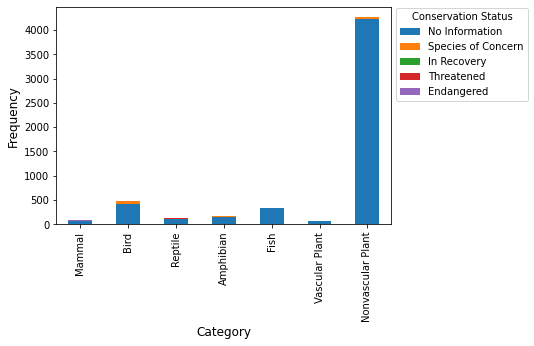

In [17]:
plt.figure(figsize = (10,8))
ax = cat_cons_crosstab.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='Conservation Status', bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_xticks(range(len(cat)))
ax.set_xticklabels(cat, rotation = 'vertical')
ax.set_xlabel('Category', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.show()

In [20]:
cat_cons_crosstab2 = pd.crosstab(species.category[species.conservation_status!= 'No Information'],
                                 species.conservation_status[species.conservation_status!= 'No Information'],
                                 dropna = True)
print(display(cat_cons_crosstab2))


conservation_status,Species of Concern,In Recovery,Threatened,Endangered
category,,,,
Amphibian,4,0,2,1
Bird,68,3,0,4
Fish,4,0,3,3
Mammal,22,0,2,6
Nonvascular Plant,5,0,0,0
Reptile,5,0,0,0
Vascular Plant,43,0,2,1


None


<Figure size 720x576 with 0 Axes>

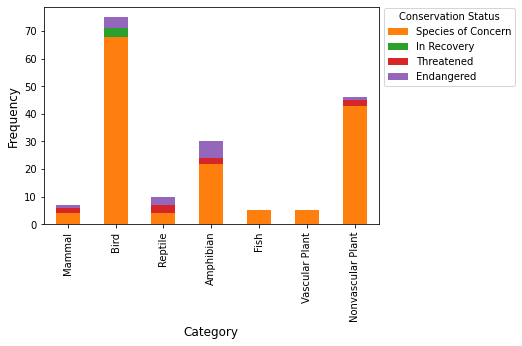

In [19]:
plt.figure(figsize = (10,8))
ax = cat_cons_crosstab2.plot(kind='bar', stacked=True, rot=0, color = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
ax.legend(title='Conservation Status', bbox_to_anchor=(1, 1.02), loc='upper left')
ax.set_xticks(range(len(cat)))
ax.set_xticklabels(cat, rotation = 'vertical')
ax.set_xlabel('Category', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
plt.show()